# Teco Customers Churn Analysis

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  read dataset
df = pd.read_csv("C:/Users/gokup/Downloads/Customer-Churn-analysis-main/Customer-Churn-analysis-main/Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Inspecting the dataset -

In [4]:
#  info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# changing the datatype and replacing

df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["TotalCharges"].dtype

dtype('float64')

In [32]:
# Describing the dateset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [54]:
# Checking for duplicates values
df["customerID"].duplicated().sum()

np.int64(0)

In [87]:
# Changing data in Senior Citizen column

def conv(value):
    if value==0:
        return "NO"
    elif value == 1:
        return "YES"
# -----------------------------

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# -----------------------------

### Now we check no. of customers churned out ----

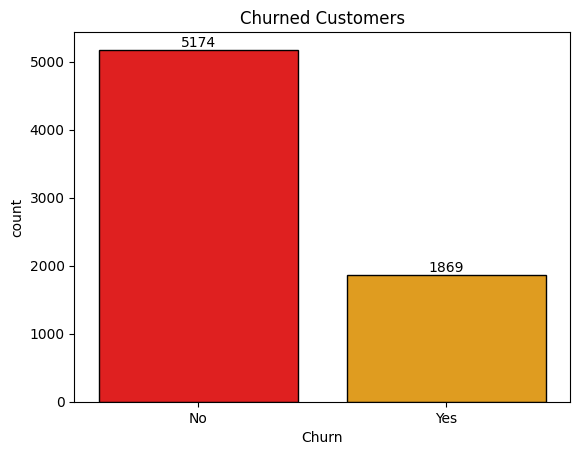

In [82]:
# by ploting graph we can check no.of customers churned

x=sns.countplot(data=df,x="Churn",hue="Churn",palette=["red","orange"],edgecolor="black")
plt.title("Churned Customers")

for bar in x.containers:
    x.bar_label(bar)

plt.show()

##### From the above chart we can see that number of customers by churn are churned out -1869 

### Now we check no. of customers acc to gender ----

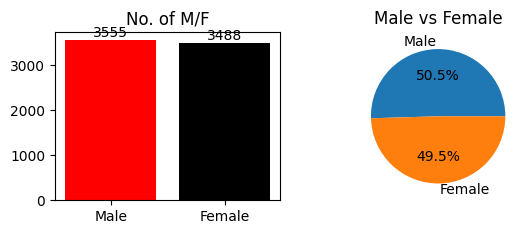

In [104]:
# by plotting countplot we can check no of customers by gender
# y=sns.countplot(data= df,x="gender",hue="gender")

gender = df["gender"].value_counts()

# subplot 1
y=plt.subplot(2,2,1)
plt.bar(x=gender.index,height=gender.values,color= ["red","black"])
plt.title("No. of M/F")
# bar labels
for bar in y.containers:
    y.bar_label(bar)

# subplot 2
plt.subplot(2,2,2)
plt.pie(x=gender.values,labels=gender.index,autopct="%1.1f%%")
plt.title("Male vs Female")

plt.show()

##### from the above sub graphs we get to know that no. of males are 1% more than females

### Gender count acc to customers churn ----

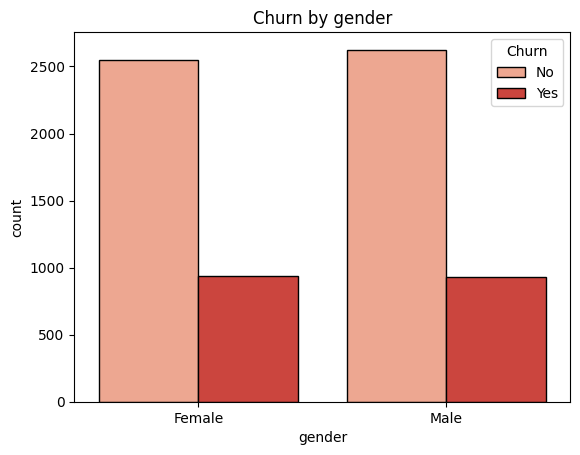

In [111]:
sns.countplot(data=df,x="gender",hue="Churn",palette="Reds",edgecolor="black")
plt.title("Churn by gender")
plt.show()

### Count of customers by senior citizen ---

C:\Users\gokup\AppData\Local\Temp\ipykernel_11828\3796280339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="SeniorCitizen",palette= ["orange","lightblue"])


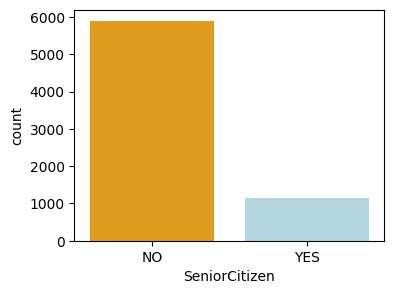

In [126]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x="SeniorCitizen",palette= ["orange","lightblue"])
plt.show()

### No. of Senior citizens by churn -----

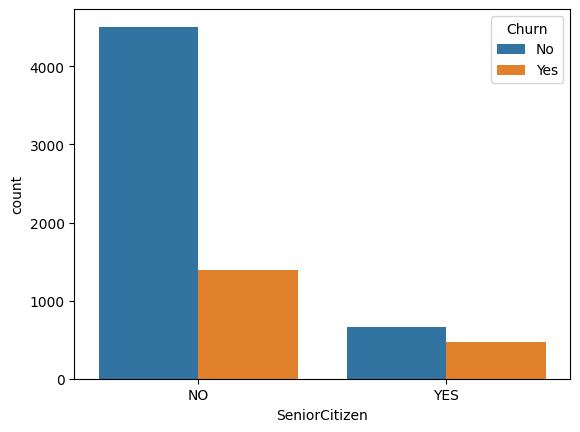

In [114]:
j=sns.countplot(data=df,x="SeniorCitizen",hue="Churn")
plt.show()


##### from the above graph we can see comparitive a greater percentage of people in senior citizen category have churned

### Number of churns by tenure ----

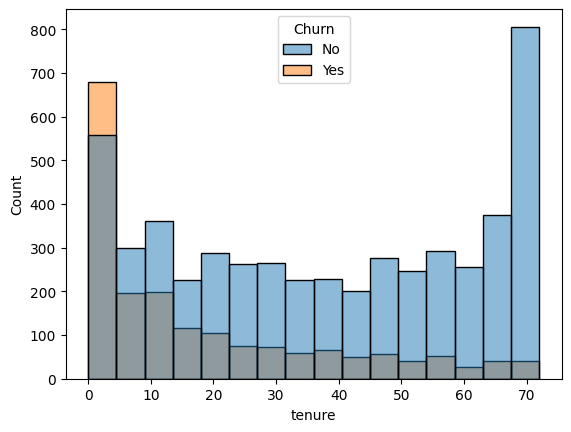

In [8]:
sns.histplot(data=df,x= "tenure",hue="Churn")
plt.show()

##### from the above graph we get to know that people who use our services for long time have stayed and who have used our services for 1 or 2 months have churned

### Count of customers by contract -----

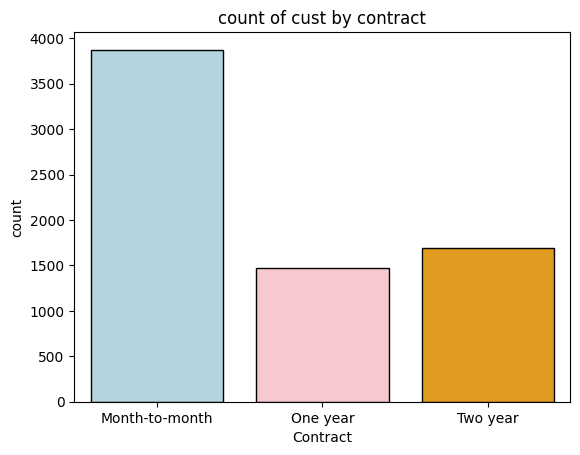

In [18]:
# by using count plot

sns.countplot(data=df,x="Contract",hue="Contract",palette=["lightblue","pink","orange"],edgecolor="black")
plt.title("count of cust by contract")
plt.show()

C:\Users\gokup\AppData\Local\Temp\ipykernel_2996\1157416384.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df,x="Contract",hue="Churn",palette=["lightblue","pink","orange"],edgecolor="black")


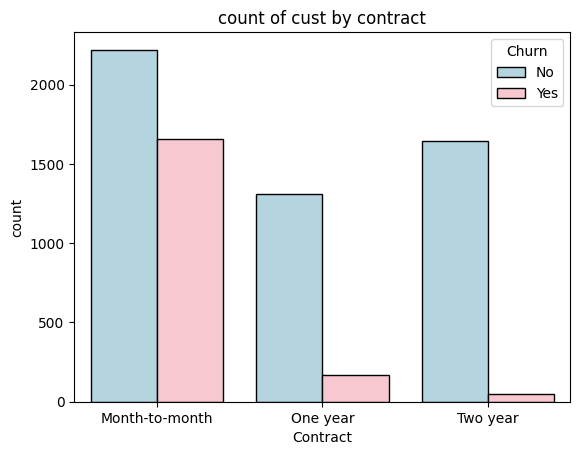

In [16]:
# count of cust by contract based on churn
sns.countplot(data=df,x="Contract",hue="Churn",palette=["lightblue","pink","orange"],edgecolor="black")
plt.title("count of cust by contract")
plt.show()

##### from above graphs we can see that people have more in month-to-month contract and are likely to churn then from those who have one or two year contract

### count of payment mode by churn ----

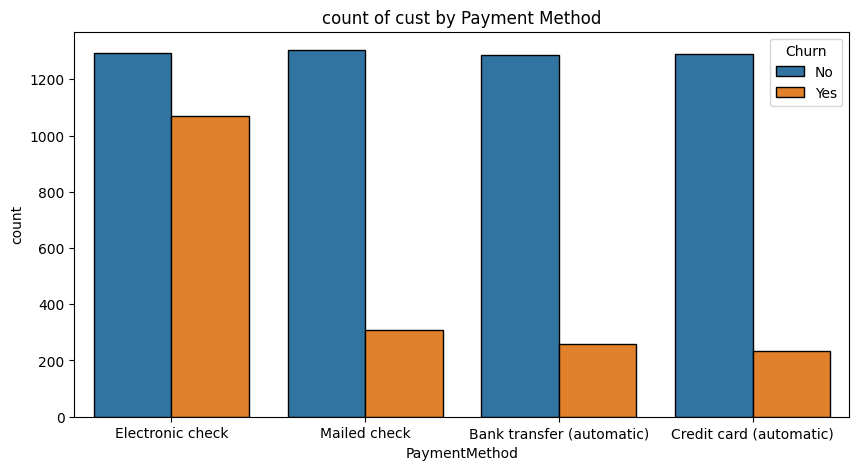

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="PaymentMethod",hue="Churn",edgecolor="black")
plt.title("count of cust by Payment Method")
plt.show()

##### Customers is likely to churn when they using electromic check as a payment method

# Conclusion  -- 

### The analysis revealed that factors like longer customer tenure, lower monthly charges reduce churn likelihood. Senior citizens and customers without tech support or online security are more prone to churn. Targeted retention strategies can be built around these findings.

#### Thank you!